In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
# from sklearn.metrics import accuracy_score

Best n clusters: 3


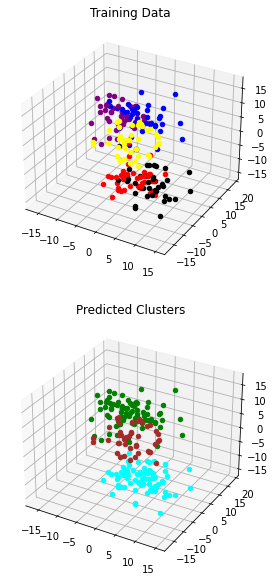

In [177]:
# # initialize kmeans class
# kmeans = KMeans(
#     init="random",
#     n_clusters=2,
#     n_init=10,
#     max_iter=300,
#     random_state=42)

n = 5

# create dataset
X, y = make_blobs(n_samples=200, centers=n, n_features=3,
                  cluster_std=3.5, random_state=42)

sil_score_max = -1 #this is the minimum possible score
best_n_clusters = 0
model = None

for n_clusters in range(2, 10):
    curr_model = KMeans(n_clusters = n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)
    labels = curr_model.fit_predict(X)
    sil_score = silhouette_score(X, labels)
#     print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
    if sil_score > sil_score_max:
        sil_score_max = sil_score
        best_n_clusters = n_clusters
        model = curr_model
print("Best n clusters:", best_n_clusters)

# fit data and generate predictions
model.fit(X)
y_pred = model.labels_

#plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.set_title("Training Data")
ax1 = fig.add_subplot(212, projection='3d')
ax1.set_title("Predicted Clusters")

colors_train = {0 : 'blue', 1 : 'red', 2 : 'purple', 3 : 'yellow', 4 : 'black'}
colors_pred = {0 : 'green', 1 : 'brown', 2 : 'cyan', 3 : 'yellow', 4 : 'black'}

for i, p in enumerate(X):
    px, py, pz = p
    c_train = colors_train[y[i]]
    c_pred = colors_pred[y_pred[i]]
    ax.scatter(px, py, pz, c=c_train)
    ax1.scatter(px, py, pz, c=c_pred)

plt.show()

In [109]:
# calculate model accuracy

# labels_zipped = zip(y, y_pred)

# c = Counter(labels_zipped)
# print(c.most_common(n_clusters))

In [128]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(211, projection='3d')
# ax.set_title("Training Data")
# ax1 = fig.add_subplot(212, projection='3d')
# ax1.set_title("Predicted Clusters")

# colors = {0 : 'b', 1 : 'r', 2 : 'purple'}

# for i, p in enumerate(X):
#     px, py, pz = p
#     c_train = colors[y[i]]
#     c_pred = colors[y_pred[i]]
#     ax.scatter(px, py, pz, c=c_train)
#     ax1.scatter(px, py, pz, c=c_pred)

# plt.show()